### Cloudify
![](cloudify_logo.PNG)

In [1]:
"""
Created on Tue June  5 12:34 2018
@author: Sibonelo Ngobese
"""
# Import libraries
import os,cv2
import warnings
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

Using TensorFlow backend.


In [4]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data'
data_dir_list = os.listdir(data_path)

In [5]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=10

In [8]:
img_data_list=[]
dirnames = []
number_of_images_per_dir = []
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    counter = 0
    counter_list = []
    for img in img_list:
        if img != 'test':
            input_img= cv2.imread(data_path + '/'+ dataset + '/'+ img)           
            input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(128,128))#,interpolation=cv2.INTER_CUBIC)
            input_img_resize = input_img_resize/255
            img_data_list.append(input_img_resize)
            counter+=1
        counter_list.append(counter)
    number_of_images_per_dir.append(len(counter_list))
    dirnames.append(dataset)

Loaded the images of dataset-stratus

Loaded the images of dataset-cirrus

Loaded the images of dataset-cumulus

Loaded the images of dataset-nimbus



In [43]:
# Define the number of classes
num_classes = len(dirnames)

In [9]:
print(number_of_images_per_dir)

[73, 217, 190, 145]


In [11]:
print(dirnames)

['stratus', 'cirrus', 'cumulus', 'nimbus']


In [12]:
img_data = np.array(img_data_list)
print (img_data.shape)

(621, 128, 128)


In [13]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(621, 1, 128, 128)


In [14]:
#%%
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
	# using sklearn for preprocessing
	from sklearn import preprocessing
	
	def image_to_feature_vector(image, size=(128, 128)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()
	
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			if img != 'test':
				input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
				input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
				input_img_flatten=image_to_feature_vector(input_img,(128,128))
				img_data_list.append(input_img_flatten)
				
	img_data = np.array(img_data_list)
	img_data = img_data.astype('float32')
	print (img_data.shape)
	img_data_scaled = preprocessing.scale(img_data)
	print (img_data_scaled.shape)
	
	print (np.mean(img_data_scaled))
	print (np.std(img_data_scaled))
	
	print (img_data_scaled.mean(axis=0))
	print (img_data_scaled.std(axis=0))
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
	if K.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
	else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)

In [15]:
if USE_SKLEARN_PREPROCESSING:
	img_data=img_data_scaled

In [16]:
#%%
# Assigning Labels
# Define the number of classes
num_classes = 4

num_of_samples = img_data.shape[0]


print("n_images: ", num_of_samples)

n_images:  621


In [18]:
# sanity check
print(number_of_images_per_dir[0]+number_of_images_per_dir[1]-2)
print(number_of_images_per_dir[0]+number_of_images_per_dir[1]+number_of_images_per_dir[2]-3)

288
477


In [19]:
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:number_of_images_per_dir[0]-1]=0
labels[number_of_images_per_dir[0]-1:number_of_images_per_dir[0]+number_of_images_per_dir[1]-2]=1
labels[number_of_images_per_dir[0]+number_of_images_per_dir[1]-2:number_of_images_per_dir[0]+number_of_images_per_dir[1]+number_of_images_per_dir[2]-3]=2
labels[number_of_images_per_dir[0]+number_of_images_per_dir[1]+number_of_images_per_dir[2]-3:]=3

# The above is similar to: IFF the num_of_samples == 621 but if the images in each dir has increased it will be different.
#labels[0:72]=0
#labels[72:288]=1
#labels[288:477]=2
#labels[477:]=3

In [20]:
#labels

In [21]:
print("Shape of images: ",img_data.shape)

Shape of images:  (621, 1, 128, 128)


In [22]:
names = dirnames
print(names)
#e.g names = ['stratus', 'cirrus','cumulus','nimbus']

['stratus', 'cirrus', 'cumulus', 'nimbus']


In [23]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [24]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

In [25]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [26]:
print(X_train.shape)

(496, 1, 128, 128)


In [27]:
#%%
# Defining the model
input_shape=img_data[0].shape

In [28]:
print(input_shape)

(1, 128, 128)


In [29]:
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [30]:
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [31]:
# Viewing model_configuration
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 128, 128)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 126, 126)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 126, 126)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 63, 63)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 61, 61)        18496     
__________

True

In [32]:
#%%
# Training
#hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

#hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=20,verbose=1, validation_split=0.2)

# Training with callbacks
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

#early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#callbacks_list = [csv_log,early_stopping,checkpoint]
callbacks_list = [csv_log,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, epochs=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)

Train on 496 samples, validate on 125 samples
Epoch 1/10
496/496 [==============================] - 198s 399ms/step - loss: 1.5021 - acc: 0.3407 - val_loss: 1.3466 - val_acc: 0.2960

Epoch 00001: val_loss improved from inf to 1.34660, saving model to Best-weights-my_model-001-1.5021-0.3407.hdf5
Epoch 2/10
496/496 [==============================] - 203s 409ms/step - loss: 1.2942 - acc: 0.3952 - val_loss: 1.3349 - val_acc: 0.4480

Epoch 00002: val_loss improved from 1.34660 to 1.33490, saving model to Best-weights-my_model-002-1.2942-0.3952.hdf5
Epoch 3/10
496/496 [==============================] - 175s 354ms/step - loss: 1.1953 - acc: 0.4516 - val_loss: 1.2034 - val_acc: 0.4880

Epoch 00003: val_loss improved from 1.33490 to 1.20345, saving model to Best-weights-my_model-003-1.1953-0.4516.hdf5
Epoch 4/10
496/496 [==============================] - 203s 410ms/step - loss: 1.1702 - acc: 0.4798 - val_loss: 1.2120 - val_acc: 0.5040

Epoch 00004: val_loss did not improve from 1.20345
Epoch 5/

In [33]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

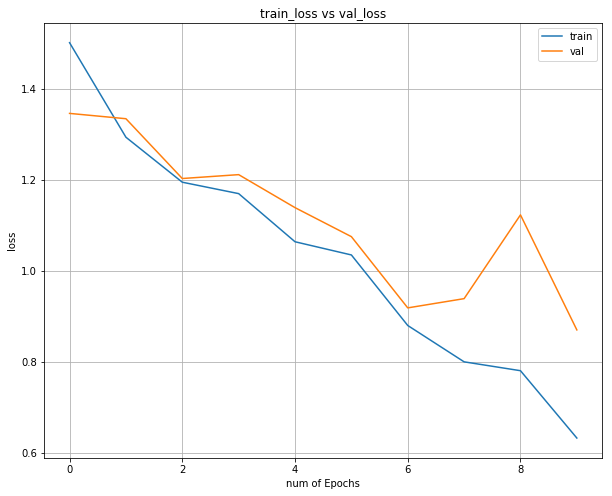

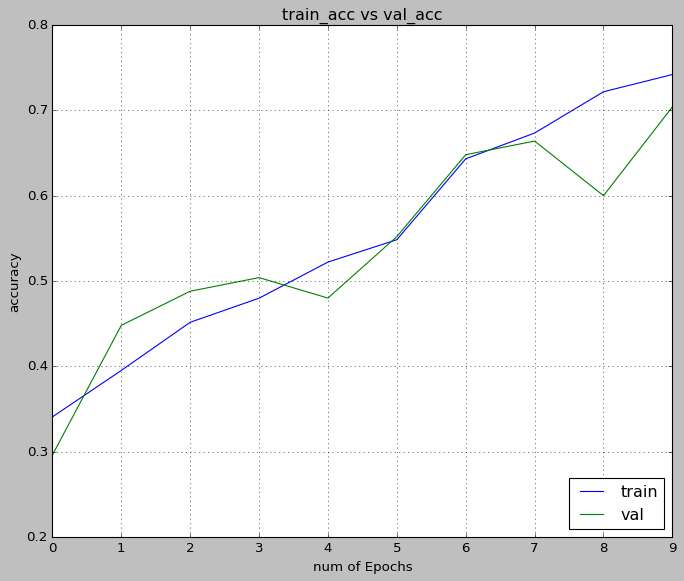

In [34]:
xc=range(num_epoch)

plt.figure(1,figsize=(10,8))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
#plt.savefig("train_loss_vs_val_los.png")
#plt.savefig("train_loss_vs_val_los.pdf")
#plt.cla()
plt.figure(2,figsize=(10,8))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
#plt.savefig("train_acc_vs_val_acc.png")
#plt.savefig("train_acc_vs_val_acc.pdf")
#%%

In [35]:
# Evaluating the model

score = model.evaluate(X_test, y_test, verbose=0)#show_accuracy=True, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

# Testing a new image
test_image = imread('data/cumulus/test/cumulus_5_005.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

Test Loss: 0.8706397132873536
Test accuracy: 0.7039999985694885
(1, 1, 128, 128)
[[0.09077336 0.16779444 0.5581031  0.18332912]]
[2]
[[0. 0. 1. 0.]]
(128, 128)


In [36]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=3) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

(1, 1, 128, 128)


In [37]:
# Predicting the test image
print("test image predict probs:",(model.predict(test_image)))
print("test image predict class:", model.predict_classes(test_image))

#%%

test image predict probs: [[1.541792e-03 1.719634e-02 9.803812e-01 8.807238e-04]]
test image predict class: [2]


In [38]:
# Visualizing the intermediate layer

#
#def get_featuremaps(model, layer_idx, X_batch):
#	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
#	activations = get_activations([X_batch,0])
#	return activations

#layer_num=3
#filter_num=0

#activations = get_featuremaps(model, int(layer_num),test_image)

#print (np.shape(activations))
#feature_maps = activations[0][0]      
#print (np.shape(feature_maps))

#if K.image_dim_ordering()=='th':
#	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
#print (feature_maps.shape)

#fig=plt.figure(figsize=(16,16))
#plt.imshow(np.array(feature_maps[:,:,int(filter_num)], dtype=np.int32),cmap='gray')
#plt.savefig("featuremaps-layer-{}".format(int(layer_num)) + "-filternum-{}".format(int(filter_num))+'.jpg')

#num_of_featuremaps=feature_maps.shape[2]
#fig=plt.figure(figsize=(16,16))	
#plt.title("featuremaps-layer-{}".format(layer_num))
#subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
#for i in range(int(num_of_featuremaps)):
#	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
#	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
#	ax.imshow(np.array(feature_maps[:,:,i], dtype=np.int32),cmap='gray')
#	plt.xticks([])
#	plt.yticks([])
#	plt.tight_layout()
#plt.show()
#fig.savefig("featuremaps-layer-{}".format(int(layer_num)) + '.jpg')

In [39]:
#%%
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print("predict probs for the whole test set:\n", Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names =  ['class {}({})'.format(clsnum, clsname) for clsnum, clsname in enumerate(names)]

#e.g target_names = ['class 0(stratus)', 'class 1(cirrus)', class 2(cumulus)','class 3(nimbus)']
					
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

predict probs for the whole test set:
 [[9.07733440e-02 1.67794436e-01 5.58103144e-01 1.83329090e-01]
 [2.73267061e-01 2.18754336e-01 2.95339257e-01 2.12639436e-01]
 [1.34050730e-04 6.85309649e-01 2.03665301e-01 1.10891044e-01]
 [2.18479727e-05 3.69499810e-03 9.94868159e-01 1.41501438e-03]
 [6.78260345e-04 4.33759093e-02 1.69356674e-01 7.86589146e-01]
 [6.88544065e-02 3.92713547e-01 3.80488098e-01 1.57943934e-01]
 [1.55425863e-02 9.27224636e-01 4.29382734e-02 1.42944138e-02]
 [4.56783734e-03 7.99575448e-01 9.84532908e-02 9.74033922e-02]
 [2.42236885e-03 6.41599223e-02 9.16546464e-01 1.68712586e-02]
 [5.27401106e-04 8.67760181e-01 3.21274363e-02 9.95850414e-02]
 [2.74592340e-02 2.63641328e-01 4.24573958e-01 2.84325451e-01]
 [6.16901743e-05 8.84937763e-01 5.40083796e-02 6.09921142e-02]
 [3.34054255e-03 9.95968133e-02 4.42001700e-01 4.55060929e-01]
 [1.18427468e-03 7.37484396e-01 8.12517554e-02 1.80079535e-01]
 [3.87465393e-10 6.03802095e-04 1.79875951e-05 9.99378204e-01]
 [1.00606570e-07

In [40]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))


Confusion matrix, without normalization
[[10  0  6  0]
 [ 1 26  6  3]
 [ 1  4 33  4]
 [ 1  2  9 19]]


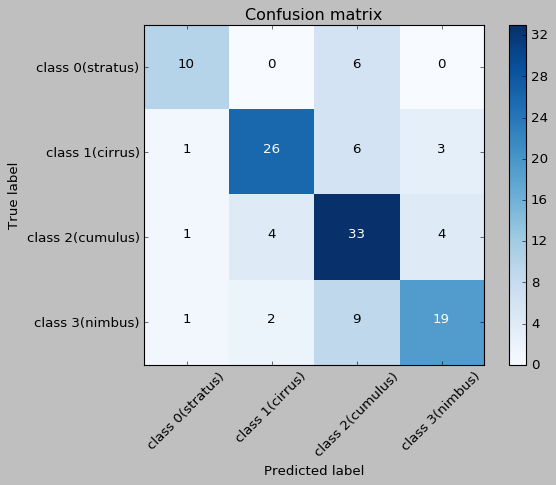

In [41]:
np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
#plt.show()
#plt.savefig("confusion_matrix.png")
#plt.savefig("confusion_matrix.pdf")

In [42]:
#%%
# Saving and loading model and weights
#from keras.models import model_from_json
#from keras.models import load_model

# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#    json_file.write(model_json)
# serialize weights to HDF5
#model.save_weights("model.h5")
#print("Saved model to disk")

# load json and create model
#json_file = open('model.json', 'r')
#loaded_model_json = json_file.read()
#json_file.close()
#loaded_model = model_from_json(loaded_model_json)
# load weights into new model
#loaded_model.load_weights("model.h5")
#print("Loaded model from disk")

#model.save('model.hdf5')
#loaded_model=load_model('model.hdf5')

In [ ]:
print(y_pred)

In [ ]:
plt.imshow(X_test)

In [ ]:
test_image_ = X_test[0:1]

In [ ]:
test_image_

In [ ]:
y_pred_ = model.predict_classes(X_test)
print(y_pred_)